# Linear Regression

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [165]:
np.random.seed(42)

In [166]:
#Helper functions

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

## Definition

Linear Regression 
- supervised machine learning algorithm
- solves a **regression** problem. 
- **Input**: **vector** $x \in R^n$ 
- **Output**: **scalar** $y \in R$.
- The value that our model predicts y is called $\hat{y}$, which is defined as:

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = b + \sum^n{w_ix_i} = w^Tx + b
$$

where

<div align="center">

$w \in R^n$, and $b \in R$ are parameters

$w$ is the vector of **coefficients**, also known as set of **weights**

$b$ is the **intercept**, also known as the **bias**

</div>

<div align="center">
    <img src="https://i.imgur.com/b7zoo7n.png" width="600" />
</div>

Our goal is to find the best fitting line (or hyperplane) that **minimizes mean squared error (MSE)** between our target variable (y) and our predicted output $\hat y$ over all samples in our dataset

$$SSE = \sum_{i=1}^{n}(y - \hat y)^2$$
$$MSE = \frac{1}{n}SSE$$

This is also known as **Ordinary Least Squares (OLS) Linear Regression**



**That means we need to estimate parameters w and b**

We will use an **optimization algorithm** known as **Gradient Descent** (and later Stochastic Gradient Descent or SGD) to solve this problem

In [167]:
x = np.array([0, 1, 2, 3, 4, 5], dtype=int) # years of experience
y = np.array([2.75, 7.2, 9.4, 16.9, 17.24, 24.32], dtype=float) # salary


def line_lr(x):
    return w*x + b

def mse(y, y_hat):
    return ((y_hat - y)**2).mean()

In [168]:
w = 5.2
# b = 6
# b = 0

👉 Senario 1: w = 3.2, b = 5

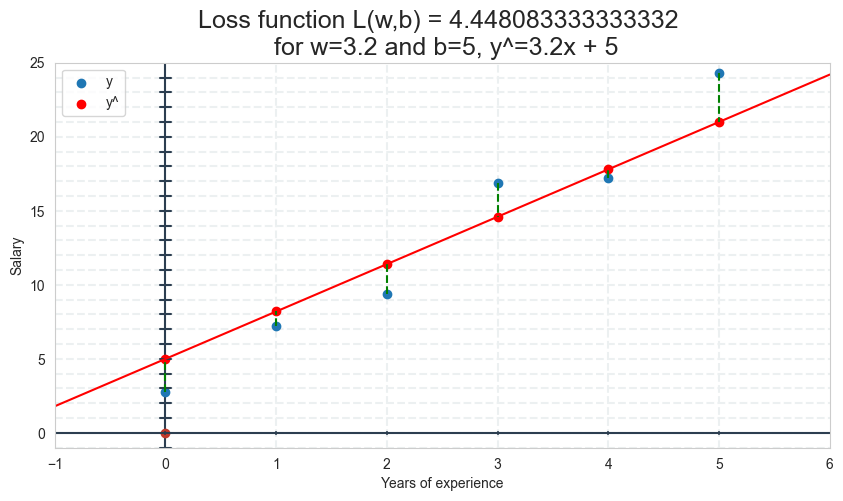

In [169]:
w = 3.2
b = 5

# -------------------PLOT CHART-------------------------
y_hat = line_lr(x) # calculate the prediction
line_x = np.arange(-1, 7)

plt.figure(figsize=(10, 5))

draw_grid(x_lim=np.array([-1, 6]), y_lim=np.array([-1, 25]))

plt.scatter(x, y, label='y')
plt.scatter(x, y_hat, c='r', label='y^')
plt.plot(line_x, line_lr(line_x), c='r')
for i, y_i in enumerate(y):
    plt.plot([i, i], [y_i, line_lr(i)], linestyle='--', c='g')
plt.title(f'Loss function L(w,b) = {mse(y, y_hat)} \n for w={w} and b={b}, y^={w}x + {b}', fontsize=18)

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()

plt.show()

👉 Senario 2: w = 4.2, b = 3

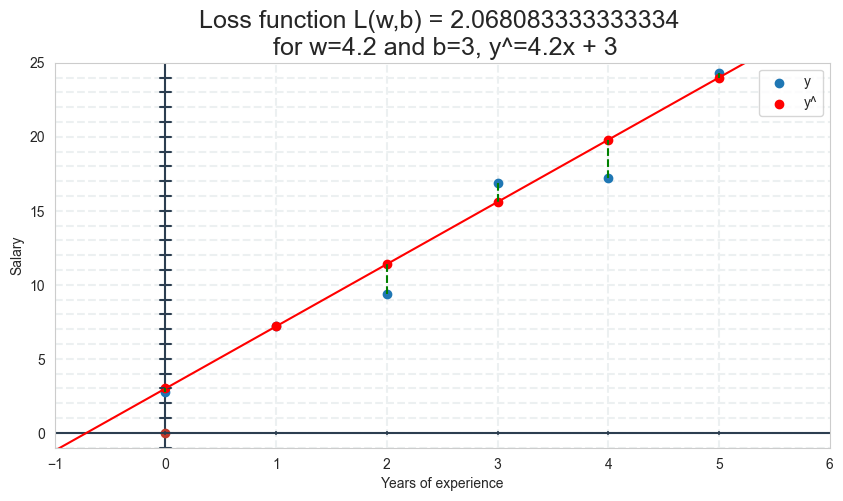

In [170]:
w = 4.2
b = 3

# -------------------PLOT CHART-------------------------
y_hat = line_lr(x) # calculate the prediction
line_x = np.arange(-1, 7)

plt.figure(figsize=(10, 5))

draw_grid(x_lim=np.array([-1, 6]), y_lim=np.array([-1, 25]))

plt.scatter(x, y, label='y')
plt.scatter(x, y_hat, c='r', label='y^')
plt.plot(line_x, line_lr(line_x), c='r')
for i, y_i in enumerate(y):
    plt.plot([i, i], [y_i, line_lr(i)], linestyle='--', c='g')
plt.title(f'Loss function L(w,b) = {mse(y, y_hat)} \n for w={w} and b={b}, y^={w}x + {b}', fontsize=18)

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()

plt.show()

# Get data

We are given the dataset with the following columns (features): how much a company spends on Radio, TV and Newspaper advertising each year and its annual Sales in terms of units sold. 

We are trying to develop an equation that will let us to **predict units sold in thousands (Sales column) based on how much a company spends on advertising (US dollar, in thousand)**. The rows represent companies.

In [171]:
df = pd.read_csv('data\\advertising.csv')

In [172]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [173]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Using a real dataset above, we will estimate of sales given a company's TV  advertising spent


In [174]:
X = df[['TV']]
y = df[['Sales']]

In [175]:
X.shape

(200, 1)

In [176]:
y.shape

(200, 1)

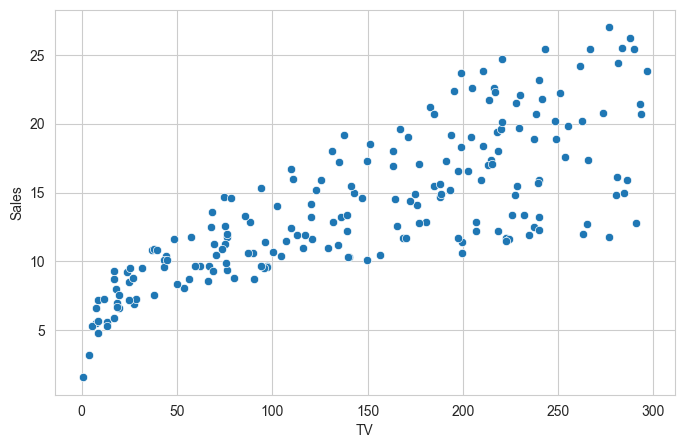

In [177]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = X['TV'], y = y['Sales'])
plt.show()

$$Sales = TV*Weight + Bias$$
$$y = Xw + b$$
- **TV is our independent variable**. In machine learning we also call these variables **features**.
- **Sales is dependent variable**. This is what we have to predict
- **Weight is the coefficient** for the TV independent variable. In machine learning we call coefficients weights.
- **Bias is the intercept where our line intercepts the y-axis**. In machine learning we can call intercepts bias. Bias offsets all predictions that we make.


We will try to **learn the correct values for Weight and Bias**. By the end of our training, our equation will approximate the line of best fit.

# Single Feature Linear Regression

## Train Test Split:

<img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2022/05/sklearn-train-test-split_syntax-explanation_v2.png" width="600">

In [178]:
# Import train test split function:
from sklearn.model_selection import train_test_split


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X train shape (160, 1)
y train shape (160, 1)
X test shape (40, 1)
y test shape (40, 1)


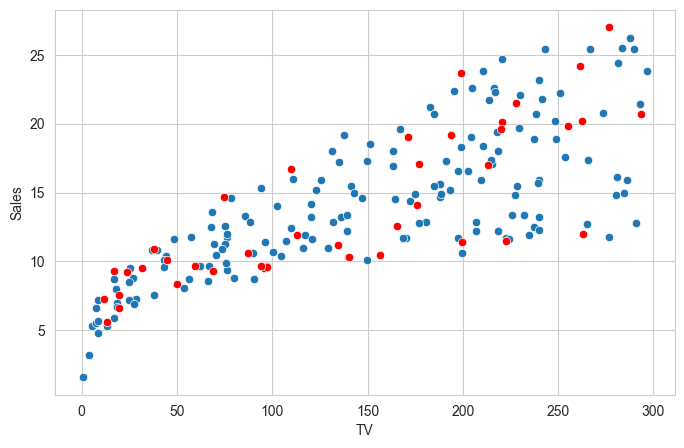

In [180]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = X_train['TV'], y = y_train['Sales'])
sns.scatterplot(x = X_test['TV'], y = y_test['Sales'], color = 'red')
plt.show()

## Import and Train model:

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [182]:
# Call model:
lr = LinearRegression()
lr

LinearRegression()

In [183]:
# Fit Train set (Train model)
lr.fit(X_train, y_train)
lr

LinearRegression()

In [184]:
# Make prediction on trainset:
y_train_pred = lr.predict(X_train)
y_train_pred.shape, X_train.shape

((160, 1), (160, 1))

Weight: [[0.04667751]]
Bias: [7.12242124]
MSE: 10.642787463072384


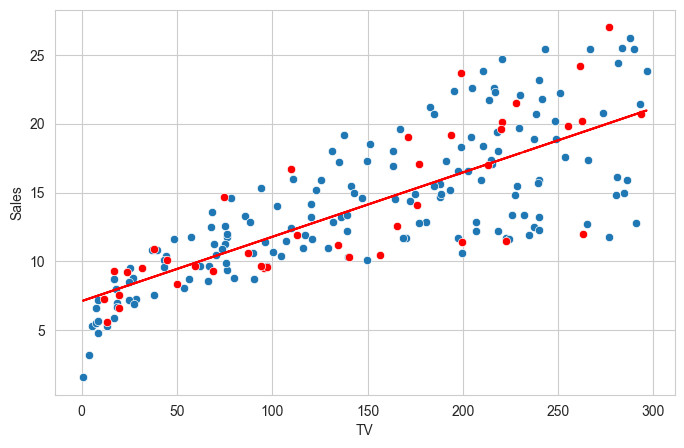

In [185]:

print(f'Weight: {lr.coef_}')
print(f'Bias: {lr.intercept_}')
print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')

plt.figure(figsize = (8,5))
sns.scatterplot(x = X_train['TV'], y = y_train['Sales'])
sns.scatterplot(x = X_test['TV'], y = y_test['Sales'], color = 'red')

plt.plot(X, lr.predict(X), c='r')

plt.show()

## Loss function

As mentioned above, we will use Mean Square Error as our loss function

A loss function is a wrapper around our model function that tells us "how good" our model is at making predictions for a given set of parameters. The loss function has its own curve and its own derivatives. The slope of this curve tells us the direction we should update our weights to make the model more accurate!

For our simple linear equation:

y = wx + b

MSE can be calculated with the formula:

$$MSE =  \frac{1}{N} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$
- $N$ is the total number of observations (data points)
- $\frac{1}{N} \sum_{i=1}^{n}$ is the mean
- $y_i$ is the actual value of an observation and $(mx_i + b)$ is our prediction

## Gradient Descent

As mentioned, the loss function has its own curve and its own derivatives

To minimize MSE we need to calculate the gradient of our loss function with respect to our weight and bias

![](https://miro.medium.com/max/1400/0*fU8XFt-NCMZGAWND.)

We want to minimize the **continuous** and **differentiable** loss function $L(w, b)$:

1. Initialize $w^0$, $b^0$
2. Repeat until converge: $\begin{cases} 
w^{t+1}_j = w^t_j - \alpha\frac{\partial L}{\partial w_j} & for\ j \in \{1, \dots, n\}\\
b^{t+1} = b^t - \alpha\frac{\partial L}{\partial b}
\end{cases}$



$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2}
$$
**Solving $\frac{\partial L}{\partial w_j}$**
$$
\frac{\partial L}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)}) \frac{\partial 
\hat{y}^{(i)}}{\partial w_j}} \\
\frac{\partial L}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)}) x^{(i)}_j} \\
$$

Vectorization:
$$
\frac{\partial L}{\partial w} = \frac{2}{m} X^T . (\hat{y} - y)
$$

**Solving $\frac{\partial L}{\partial b}$**

$$
\frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}
$$

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

## Interpretation & Prediction

(Taken from Sklearn results above)


- Weight: [0.04667751]
- Bias: 7.12242124
- MSE: 10.51939855708484

By learning the best values for weight and bias, we now have an equation that predicts future sales (unit: 1000) based on TV advertising investment (unit: $1000)

$$Sales = .047 * TV + 7.122$$

- Question: What does the intercept (bias) mean for this particular problem (what happens with sale when there's no TV advertising budget)?
    - The intercept is the value of output when the input is 0. In this case, it is the estimated value of sales in the absence of a TV advertising budget. The value of the intercept here is 7.122, which means that without TV advertisements, the number of units sold is 7,122 (Sales*1000 units).

- What happens if we increase TV advertising budget by 1 unit ($1000)
    - The coefficient or the slope is the measure of the change in the output variable per unit change in the input variable. Here, the coefficient of Model is 0.047, which means that if we increase the TV advertising budget by 1 unit ($1000), the sales of the product will increase by approximately 47 units (0.048*1000).
    
- How would this model perform in the real world? Decent, but we can improve this model by including other features.

👉 For Test dataset

In [188]:
# Prediction with X_test:
y_test_pred = lr.predict(X_test)
y_test_pred[:10]

array([[10.60923129],
       [19.04385745],
       [12.39231219],
       [12.24761191],
       [ 8.59276283],
       [ 8.02796495],
       [19.38460328],
       [17.08340201],
       [13.67127598],
       [17.41481233]])

In [187]:
# Check test dataset mean square error 
mean_squared_error(y_test, y_test_pred)

10.025842933134657

In [189]:
comp_df = pd.concat([X_test.reset_index().drop(columns = 'index'),
                    y_test.reset_index().drop(columns = 'index'),
                    pd.DataFrame(y_test_pred)], axis = 1)
comp_df.columns = ['X_test', 'actual_sales', 'pred_sales']
comp_df.head()

,X_test,actual_sales,pred_sales
0,74.7,14.7,10.609231
1,255.4,19.8,19.043857
2,112.9,11.9,12.392312
3,109.8,16.7,12.247612
4,31.5,9.5,8.592763


In [190]:
# What's if TV adv cost is 200, predict the sales:
lr.predict(np.array([[200]]))

array([[16.45792336]])

# Multiple linear regression

Now we will consider all the features for our sale prediction

In [191]:
# Features: TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']].values
y = df[['Sales']].values
X.shape, y.shape

((200, 3), (200, 1))

In [192]:
# Train tesest split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X train shape (160, 3)
y train shape (160, 1)
X test shape (40, 3)
y test shape (40, 1)


In [193]:
# Train model (fit model):
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [194]:
# Prediction on Trainset:
y_train_pred = lr.predict(X_train)
y_train_pred[:10]

array([[12.95763215],
       [ 9.63077656],
       [10.08367614],
       [ 7.88900532],
       [11.44192114],
       [ 9.93682953],
       [ 8.82788656],
       [16.21463981],
       [13.16403148],
       [20.83312719]])

In [197]:
# model information and evaluation:
print(f'Weights: {lr.coef_}')
print(f'Bias: {lr.intercept_}')
print(f'Train-set MSE: {mean_squared_error(y_train, y_train_pred)}')

Weights: [[0.04532832 0.18994063 0.00027396]]
Bias: [2.90131369]
Train-set MSE: 2.968918089281973


In [198]:
# Predict on Test-set:
y_test_pred = lr.predict(X_test)
print(f'Test-set MSE: {mean_squared_error(y_test, y_test_pred)}')


Test-set MSE: 2.063418850121476


## Polynomial Linear Regression & Overfitting/Underfitting

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png" width="600">

A polynomial degree 1 gives us the simple linear regression model:

$$
\hat{y} = wx + b,\ with\ x, \hat{y} \in R
$$

By adding $x^2$ as another feature, the model becomes a quadratic function of $x$:

$$
\hat{y} = w_1x + w_2x^2 + b
$$

We can continue to add more powers of $x$ as additional features to obtain a polynomial of degree $n$

$$
\hat{y} = b + \sum_{i=1}^n{w_ix^i}
$$

In [219]:
df = pd.read_csv('data\\poly_example_1.csv')
x = df[['X']].values
y = df[['Y']].values

In [205]:
df.head()

,X,Y
0,-5.000000,-38.072172
1,-4.907407,-26.810358
2,-4.691358,-23.012746
3,-4.629630,-17.362182
4,-4.382716,-24.947186


In [206]:
# import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [225]:
# Define a instance of PolynomialFeatures with degree=2 called 'poly_reg'
poly_reg = PolynomialFeatures(degree = 3,include_bias=False)

# Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
X_poly = poly_reg.fit_transform(x)



In [212]:
x.shape, X_poly.shape

((65, 1), (65, 3))

In [214]:
x[:5], X_poly[:5]

(array([[-5.        ],
        [-4.90740741],
        [-4.69135802],
        [-4.62962963],
        [-4.38271605]]),
 array([[  -5.        ,   25.        , -125.        ],
        [  -4.90740741,   24.08264746, -118.18336255],
        [  -4.69135802,   22.00884012, -103.25134869],
        [  -4.62962963,   21.43347051,  -99.22903013],
        [  -4.38271605,   19.20819997,  -84.18408629]]))

**Example**

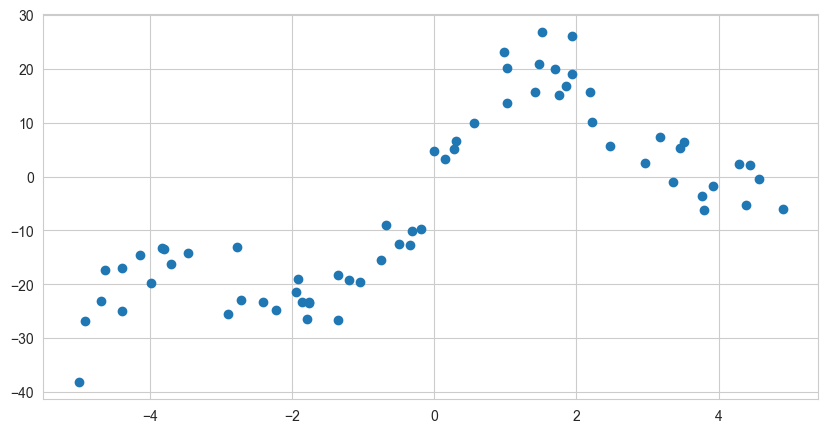

In [220]:
x = df[['X']].values
y = df[['Y']].values

# Let's plot the dataset using plt.scatter()
plt.figure(figsize=(10, 5))

# Your code here
plt.scatter(x, y)

plt.show()

In [227]:
x.shape,y.shape

((65, 1), (65, 1))

In [226]:
# Split the data in 80% training and 20% validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X train shape (52, 1)
y train shape (52, 1)
X test shape (13, 1)
y test shape (13, 1)


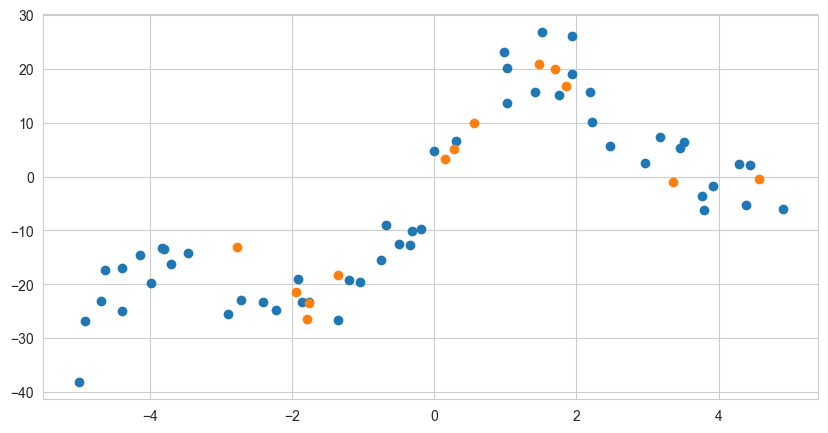

In [228]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

MSE on train set: 14.737256581328475
MSE on validation set: 8.03887005429402


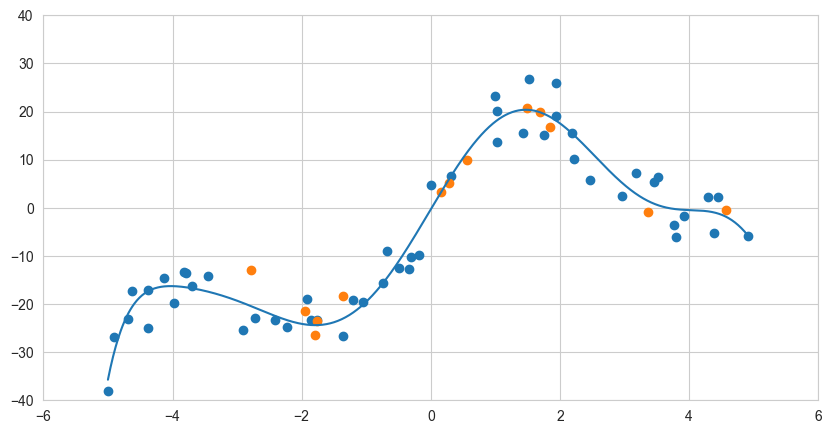

In [274]:
# Building Polynomial Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# degree = 5 # hyperparameter
degree = 9

# Define a instance of LinearRegression called 'lm'
lm = LinearRegression() # them bias cho LR

# Define a instance of PolynomialFeatures with degree called 'poly_reg'
poly_reg = PolynomialFeatures(degree = degree,include_bias = False) # them cot 1

# Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

# Fitting the Linear Regression Model to the training set (X_train_poly)
lm.fit(X_train_poly, y_train)

# Predict test set and save the result in 'y_test_predict'
y_test_predict = lm.predict(X_test_poly)
y_train_predict = lm.predict(X_train_poly)

print(f'MSE on train set: {mean_squared_error(y_train,y_train_predict)}')
print(f'MSE on validation set: {mean_squared_error(y_test,y_test_predict)}')


# plotting purposes
x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_plot = lm.predict(poly_reg.fit_transform(x_plot))
plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlim(-6, 6)
plt.ylim(-40, 40)
plt.show()

In [270]:
results = {'degree': [], 'train_mse': [], 'test_mse': []}

for d in range(1, 22):

    degree = d

    # Define a instance of LinearRegression called 'lm'
    lm = LinearRegression() # them bias cho LR

    # Define a instance of PolynomialFeatures with degree called 'poly_reg'
    poly_reg = PolynomialFeatures(degree = degree,include_bias = False) # them cot 1

    # Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)

    # Fitting the Linear Regression Model to the training set (X_train_poly)
    lm.fit(X_train_poly, y_train)

    # Predict test set and save the result in 'y_test_predict'
    y_test_predict = lm.predict(X_test_poly)
    y_train_predict = lm.predict(X_train_poly)

    # Save to result dict:
    results['degree'].append(d)
    results['train_mse'].append(mean_squared_error(y_train,y_train_predict))
    results['test_mse'].append(mean_squared_error(y_test,y_test_predict))

result_df = pd.DataFrame(results)
result_df.head()

,degree,train_mse,test_mse
0,1,128.938787,156.715959
1,2,115.545033,132.458950
2,3,65.486691,49.719674
3,4,63.295489,55.358458
4,5,21.062535,14.133706


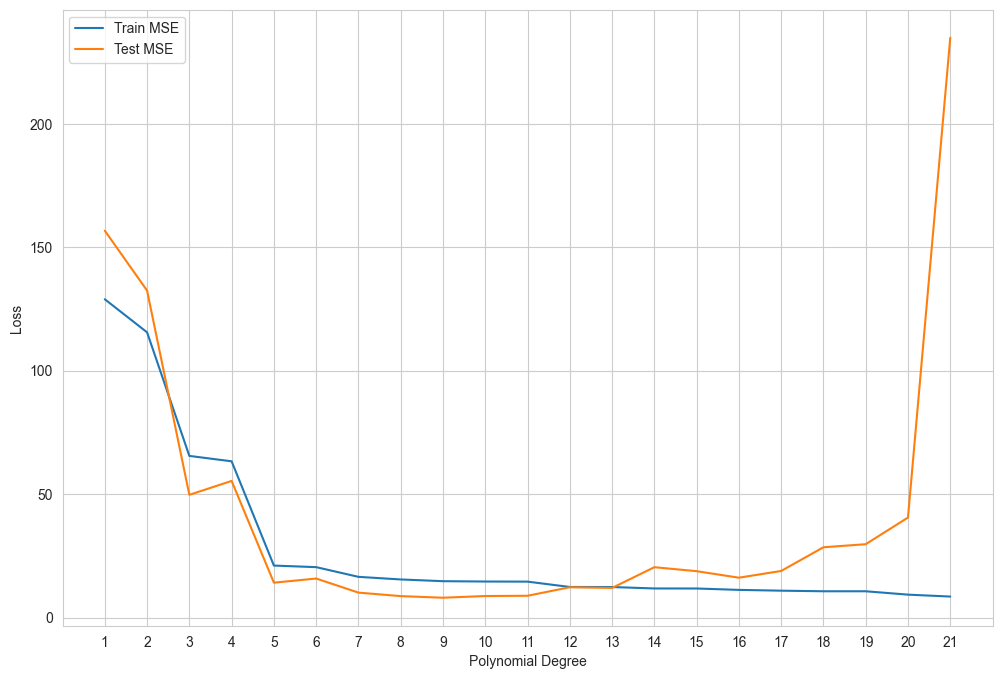

In [271]:
fig = plt.subplots(figsize =(12, 8))
 
# Make the plot
plt.plot(result_df['degree'], result_df['train_mse'],label ='Train MSE')
plt.plot(result_df['degree'], result_df['test_mse'], label ='Test MSE')
 
# Adding Xticks
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')

plt.xticks(result_df['degree'])
 
plt.legend()
plt.show()

In [275]:
lm.coef_,lm.intercept_ # degree = 30

(array([[ 2.25690256e+01, -3.57773242e-01, -4.17084579e+00,
         -1.53142517e-01,  3.28228460e-01,  1.55003364e-02,
         -1.19713730e-02, -4.06506552e-04,  1.70100664e-04]]),
 array([-0.30038237]))

![](https://www.researchgate.net/profile/Hayder_Al-Behadili/publication/325999203/figure/fig4/AS:641844216074241@1530038994324/Overfitting-and-underfitting-effect-on-error.png)

# GEATE JOB! 😉